# Prediccion de viviendas

## Importacion de librerias

In [1]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
regresion_lineal = LinearRegression()

## Importacion de dato

In [2]:
data = pd.read_csv("data.csv")

## Lectura de datos y exploracion

In [3]:
data.head()

Location  Size (sqft)  Bedrooms  Age (years) Price ($)
0  Downtown         1200         3           10   350,000
1    Suburb         1800         4            5   420,000
2     Rural         2400         5           15   300,000
3     Urban         1500         3            7   375,000
4   Coastal         2000         4            8   450,000

In [4]:
# Numero de filas y columnas
data.shape

(5, 5)

In [5]:
# Tipo de datos de cada columna
data.dtypes

Location       object
Size (sqft)     int64
Bedrooms        int64
Age (years)     int64
Price ($)      object
dtype: object

In [6]:
# Se corrige la infromacion de Price para hacerla int
data["Price ($)"] = data["Price ($)"].str.replace(',', '').astype(int)

In [7]:
# Tipo de datos de cada columna
data.dtypes

Location       object
Size (sqft)     int64
Bedrooms        int64
Age (years)     int64
Price ($)       int32
dtype: object

In [8]:
# Inofrmacion de los datos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Location     5 non-null      object
 1   Size (sqft)  5 non-null      int64 
 2   Bedrooms     5 non-null      int64 
 3   Age (years)  5 non-null      int64 
 4   Price ($)    5 non-null      int32 
dtypes: int32(1), int64(3), object(1)
memory usage: 312.0+ bytes


In [9]:
data.describe()

Size (sqft)  Bedrooms  Age (years)      Price ($)
count     5.000000   5.00000     5.000000       5.000000
mean   1780.000000   3.80000     9.000000  379000.000000
std     460.434577   0.83666     3.807887   58779.248039
min    1200.000000   3.00000     5.000000  300000.000000
25%    1500.000000   3.00000     7.000000  350000.000000
50%    1800.000000   4.00000     8.000000  375000.000000
75%    2000.000000   4.00000    10.000000  420000.000000
max    2400.000000   5.00000    15.000000  450000.000000

In [10]:
# Se buscan nulos
data.isnull().sum()

Location       0
Size (sqft)    0
Bedrooms       0
Age (years)    0
Price ($)      0
dtype: int64

In [11]:
"""La funcion nunique nos permite saber cuantos valores diferentes hay en cada columna, es similar a lo que se hizo al inicio,
   con la diferencias de que aqui solo extraemos el numero de valores unicos y no cuales son"""
data.nunique()

Location       5
Size (sqft)    5
Bedrooms       3
Age (years)    5
Price ($)      5
dtype: int64

## Visualizacion
se viusalizan los datos para encontrar outliers

In [12]:
data.columns

Index(['Location', 'Size (sqft)', 'Bedrooms', 'Age (years)', 'Price ($)'], dtype='object')

In [13]:
Variables_numericas = ["Size (sqft)","Bedrooms","Age (years)","Price ($)"]

In [14]:
for i in Variables_numericas:
  data2 = go.Box(y = data[i])
  layout = go.Layout(title = i)
  fig = go.Figure(data = data2, layout = layout)
  fig.show()

Se busca la correlacion de los datos apra seleccionar las variables

<Figure size 200x200 with 0 Axes>

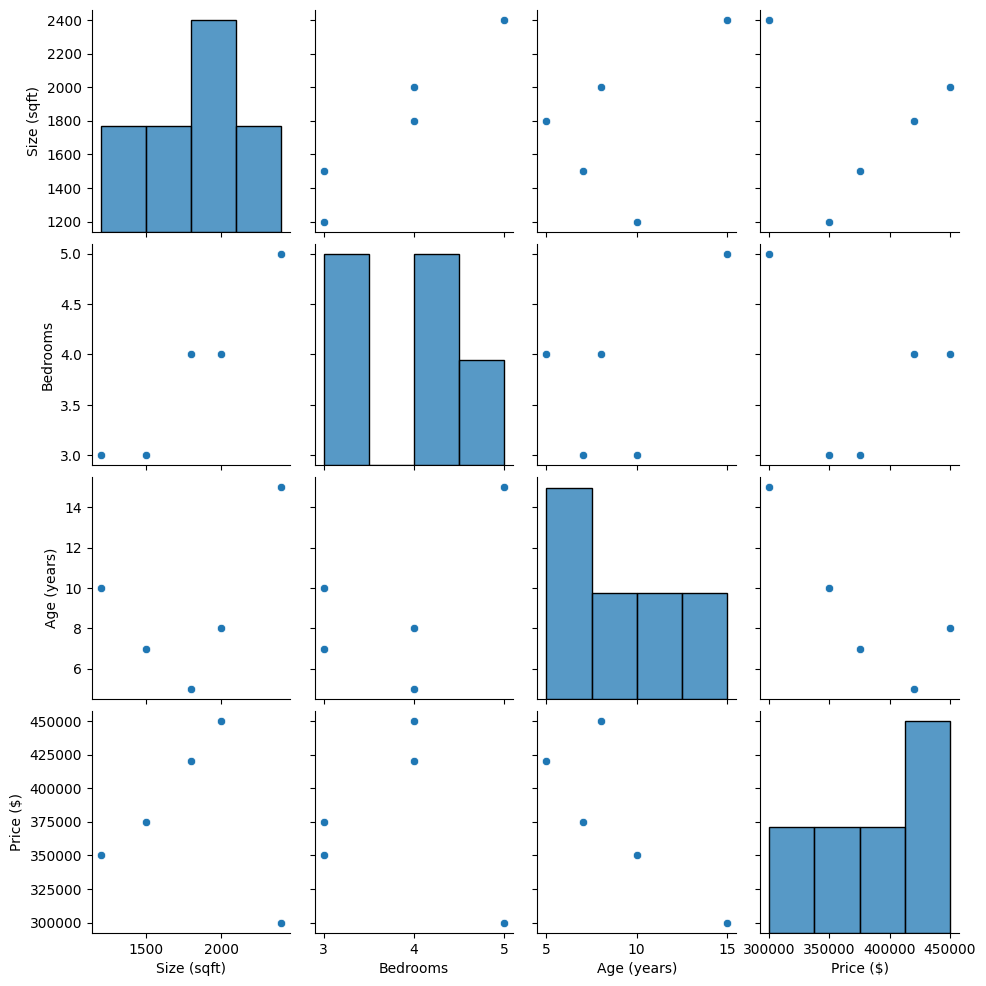

In [15]:
plt.figure(figsize=(2,2))
sns.pairplot(data)

<Axes: >

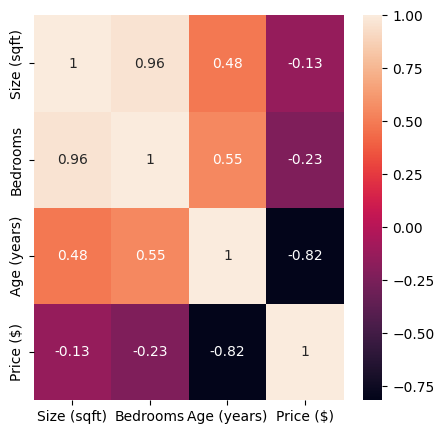

In [16]:
correlacion = data.select_dtypes(include=['number']).corr()
plt.figure(figsize=(5,5))
sns.heatmap(correlacion, annot=True)

In [17]:
# Se ordenan las variables de acuerdo a su correlacion con price
precio = correlacion.corr()
precio = precio.loc[:,["Price ($)"]]
precio.sort_values(ascending=False, by= "Price ($)")

Price ($)
Price ($)     1.000000
Size (sqft)  -0.649449
Bedrooms     -0.720909
Age (years)  -0.994074

<Axes: >

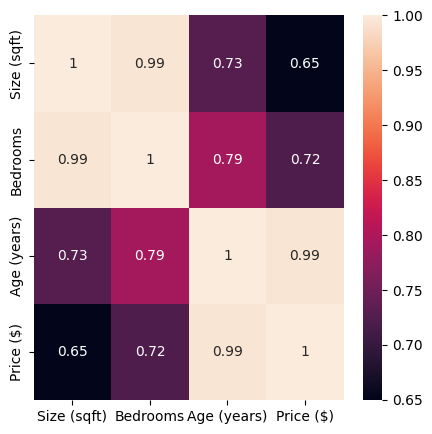

In [18]:
# Mapa con valor absoluto
plt.figure(figsize=(5,5))
sns.heatmap(correlacion.corr().abs(),annot = True)

In [19]:
# Se ordenan las variables de acuerdo a su correlacion con price
precio = correlacion.corr().abs()
precio = precio.loc[:,["Price ($)"]]
precio.sort_values(ascending=False, by= "Price ($)")

Price ($)
Price ($)     1.000000
Age (years)   0.994074
Bedrooms      0.720909
Size (sqft)   0.649449

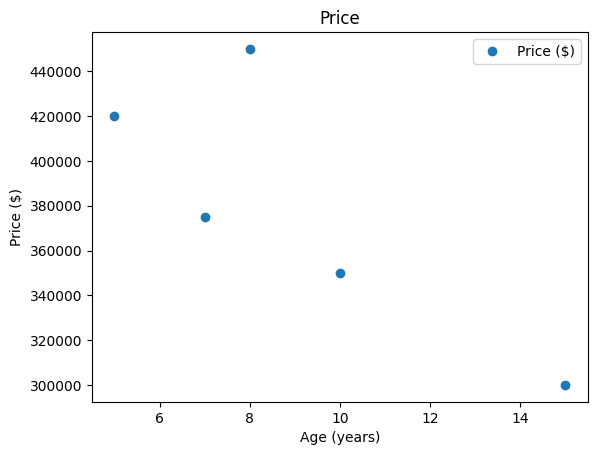

In [20]:
data.plot(x='Age (years)', y='Price ($)', style="o")
plt.title('Price')
plt.xlabel('Age (years)')
plt.ylabel('Price ($)')
plt.show()

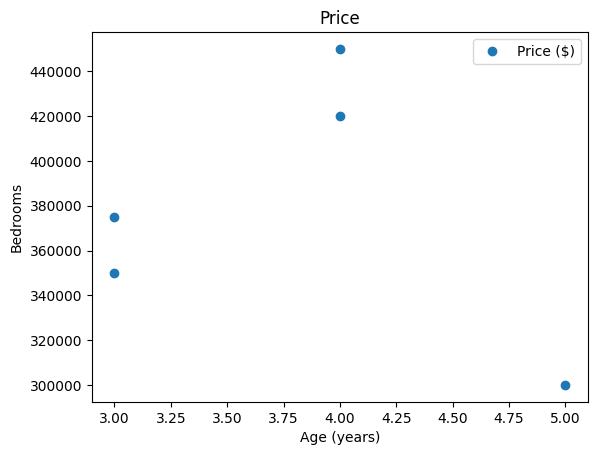

In [21]:
data.plot(x='Bedrooms', y='Price ($)', style="o")
plt.title('Price')
plt.xlabel('Age (years)')
plt.ylabel('Bedrooms')
plt.show()

## modelo 1

In [22]:
#Preparacion de datos
x_hipot1 = data.iloc[:, 2].values.reshape(-1, 1)
y_hipot1 = data.iloc[:, -1].values

In [23]:
x_hipot1_train, x_hipot1_test, y_hipot1_train, y_hipot1_test = train_test_split(x_hipot1, y_hipot1, test_size = 0.20, random_state = 43)

In [24]:
# Regresion lineal
regresion_lineal.fit(x_hipot1_train,y_hipot1_train)

LinearRegression()

In [25]:
# predecimos lso valores y para los datos usados en el entrenamiento
prediccion_entrenamiento = regresion_lineal.predict(x_hipot1_train)

# Calculamos el error cuadratico medio (MSE)
mse_hipot1_train =  mean_squared_error(y_true = y_hipot1_train, y_pred = prediccion_entrenamiento)
print("Error cuadratico medio (MSE) Train: "+ str(mse_hipot1_train))

# Predecimos los valores y para los datos usados en el entrenamiento
prediccion_entrenamiento = regresion_lineal.predict(x_hipot1_test)

# Calculamos el Error Cuadratico Medio (MSE)
mse_hipot1_test = mean_squared_error(y_true = y_hipot1_test, y_pred = prediccion_entrenamiento)
print("Error cuadratico medio (MSE) test: "+ str(mse_hipot1_test))

Error cuadratico medio (MSE) Train: 3137499999.9999986
Error cuadratico medio (MSE) test: 899999999.9999965


In [26]:
# se escala la variable charges para hacerla mas estandar
scaler = StandardScaler()

"""Los algortimos de preprocessing de skelearn estan preparados para convertir matrices pro lo que tenemos que hacer una transformacion de nuestra variable y ya que es una variable de tipo Series,
para ello hacemos un .to_numpy que nos convierte la serie en un array y luego hacemos un reshape (-1,1) para transformar un array de 1xn en una matriz de nx1"""
# Ajustamos y transformamos 'y_hipot1'
y_hipot1 = scaler.fit_transform(y_hipot1.reshape(-1, 1))
# Se vuelve a transformar nuestra variable en un array de 1xn
y_hipot1 = y_hipot1.reshape(1, -1)[0]

In [27]:
x_hipot1_train, x_hipot1_test, y_hipot1_train, y_hipot1_test = train_test_split(x_hipot1, y_hipot1, test_size = 0.20, random_state = 43)

In [28]:
# Regresion lineal
regresion_lineal.fit(x_hipot1_train,y_hipot1_train)

LinearRegression()

In [29]:
# predecimos lso valores y para los datos usados en el entrenamiento
prediccion_entrenamiento = regresion_lineal.predict(x_hipot1_train)

# Calculamos el error cuadratico medio (MSE)
mse_hipot1_train =  mean_squared_error(y_true = y_hipot1_train, y_pred = prediccion_entrenamiento)
print("Error cuadratico medio (MSE) Train: "+ str(mse_hipot1_train))

# Predecimos los valores y para los datos usados en el entrenamiento
prediccion_entrenamiento = regresion_lineal.predict(x_hipot1_test)

# Calculamos el Error Cuadratico Medio (MSE)
mse_hipot1_test = mean_squared_error(y_true = y_hipot1_test, y_pred = prediccion_entrenamiento)
print("Error cuadratico medio (MSE) test: "+ str(mse_hipot1_test))

Error cuadratico medio (MSE) Train: 1.1351302460202604
Error cuadratico medio (MSE) test: 0.32561505065122937


In [30]:
prediccion_hipot1 = regresion_lineal.predict(x_hipot1_test)
prediccion_hipot1 = pd.DataFrame(prediccion_hipot1)


In [31]:
prediccion_hipot1 = regresion_lineal.predict(x_hipot1_test)
prediccion_hipot1 = pd.DataFrame(prediccion_hipot1)
prediccion_hipot1.reset_index(drop = True, inplace = True)
y_hipot1_test=y_hipot1_test.tolist()
df = pd.DataFrame(y_hipot1_test, columns = ['y_hipot1_test'])
df1 = df.join(prediccion_hipot1)
df1

y_hipot1_test         0
0      -0.076084  0.494543

## modelo 2

In [32]:
#Preparacion de datos
x_hipot1 = data.iloc[:, 3].values.reshape(-1, 1)
y_hipot1 = data.iloc[:, -1].values

In [33]:
x_hipot1_train, x_hipot1_test, y_hipot1_train, y_hipot1_test = train_test_split(x_hipot1, y_hipot1, test_size = 0.20, random_state = 43)

In [34]:
# Regresion lineal
regresion_lineal.fit(x_hipot1_train,y_hipot1_train)

LinearRegression()

In [35]:
# predecimos lso valores y para los datos usados en el entrenamiento
prediccion_entrenamiento = regresion_lineal.predict(x_hipot1_train)

# Calculamos el error cuadratico medio (MSE)
mse_hipot1_train =  mean_squared_error(y_true = y_hipot1_train, y_pred = prediccion_entrenamiento)
print("Error cuadratico medio (MSE) Train: "+ str(mse_hipot1_train))

# Predecimos los valores y para los datos usados en el entrenamiento
prediccion_entrenamiento = regresion_lineal.predict(x_hipot1_test)

# Calculamos el Error Cuadratico Medio (MSE)
mse_hipot1_test = mean_squared_error(y_true = y_hipot1_test, y_pred = prediccion_entrenamiento)
print("Error cuadratico medio (MSE) test: "+ str(mse_hipot1_test))

Error cuadratico medio (MSE) Train: 866981132.0754715
Error cuadratico medio (MSE) test: 1592461730.1530843


In [36]:
# se escala la variable charges para hacerla mas estandar
scaler = StandardScaler()

"""Los algortimos de preprocessing de skelearn estan preparados para convertir matrices pro lo que tenemos que hacer una transformacion de nuestra variable y ya que es una variable de tipo Series,
para ello hacemos un .to_numpy que nos convierte la serie en un array y luego hacemos un reshape (-1,1) para transformar un array de 1xn en una matriz de nx1"""
# Ajustamos y transformamos 'y_hipot1'
y_hipot1 = scaler.fit_transform(y_hipot1.reshape(-1, 1))
# Se vuelve a transformar nuestra variable en un array de 1xn
y_hipot1 = y_hipot1.reshape(1, -1)[0]

In [37]:
x_hipot1_train, x_hipot1_test, y_hipot1_train, y_hipot1_test = train_test_split(x_hipot1, y_hipot1, test_size = 0.20, random_state = 43)

In [38]:
# Regresion lineal
regresion_lineal.fit(x_hipot1_train,y_hipot1_train)

LinearRegression()

In [39]:
# predecimos lso valores y para los datos usados en el entrenamiento
prediccion_entrenamiento = regresion_lineal.predict(x_hipot1_train)

# Calculamos el error cuadratico medio (MSE)
mse_hipot1_train =  mean_squared_error(y_true = y_hipot1_train, y_pred = prediccion_entrenamiento)
print("Error cuadratico medio (MSE) Train: "+ str(mse_hipot1_train))

# Predecimos los valores y para los datos usados en el entrenamiento
prediccion_entrenamiento = regresion_lineal.predict(x_hipot1_test)

# Calculamos el Error Cuadratico Medio (MSE)
mse_hipot1_test = mean_squared_error(y_true = y_hipot1_test, y_pred = prediccion_entrenamiento)
print("Error cuadratico medio (MSE) test: "+ str(mse_hipot1_test))

Error cuadratico medio (MSE) Train: 0.3136690058160172
Error cuadratico medio (MSE) test: 0.576143896582156


In [40]:
prediccion_hipot1 = regresion_lineal.predict(x_hipot1_test)
prediccion_hipot1 = pd.DataFrame(prediccion_hipot1)
# prediccion_hipot1.reset_index(drop = True, inplace = True)
# y_hipot1_test.reset_index(drop = True, inplace = True)
# df1 = y_hipot1_test.join(prediccion_hipot1)

In [41]:
prediccion_hipot1 = regresion_lineal.predict(x_hipot1_test)
prediccion_hipot1 = pd.DataFrame(prediccion_hipot1)
prediccion_hipot1.reset_index(drop = True, inplace = True)
y_hipot1_test=y_hipot1_test.tolist()
df = pd.DataFrame(y_hipot1_test, columns = ['y_hipot1_test'])
df1 = df.join(prediccion_hipot1)
df1

y_hipot1_test         0
0      -0.076084  0.682958

Por tener poca informacion el resultado no estara ni cerca de los costos correctos

# Pruebe con dataset

Se examinara el dataset y se vera si es apto para una mejor regresion

In [43]:
data2 = pd.read_csv("house_price_regression_dataset.csv")

In [44]:
data2.head()

Square_Footage  Num_Bedrooms  Num_Bathrooms  Year_Built  Lot_Size  \
0            1360             2              1        1981  0.599637   
1            4272             3              3        2016  4.753014   
2            3592             1              2        2016  3.634823   
3             966             1              2        1977  2.730667   
4            4926             2              1        1993  4.699073   

   Garage_Size  Neighborhood_Quality   House_Price  
0            0                     5  2.623829e+05  
1            1                     6  9.852609e+05  
2            0                     9  7.779774e+05  
3            1                     8  2.296989e+05  
4            0                     8  1.041741e+06

In [45]:
data2.shape

(1000, 8)

In [48]:
data2.dtypes

Square_Footage            int64
Num_Bedrooms              int64
Num_Bathrooms             int64
Year_Built                int64
Lot_Size                float64
Garage_Size               int64
Neighborhood_Quality      int64
House_Price             float64
dtype: object

In [47]:
data2.describe()

Square_Footage  Num_Bedrooms  Num_Bathrooms   Year_Built     Lot_Size  \
count     1000.000000   1000.000000    1000.000000  1000.000000  1000.000000   
mean      2815.422000      2.990000       1.973000  1986.550000     2.778087   
std       1255.514921      1.427564       0.820332    20.632916     1.297903   
min        503.000000      1.000000       1.000000  1950.000000     0.506058   
25%       1749.500000      2.000000       1.000000  1969.000000     1.665946   
50%       2862.500000      3.000000       2.000000  1986.000000     2.809740   
75%       3849.500000      4.000000       3.000000  2004.250000     3.923317   
max       4999.000000      5.000000       3.000000  2022.000000     4.989303   

       Garage_Size  Neighborhood_Quality   House_Price  
count  1000.000000           1000.000000  1.000000e+03  
mean      1.022000              5.615000  6.188610e+05  
std       0.814973              2.887059  2.535681e+05  
min       0.000000              1.000000  1.116269e+05  
25%       0.000000              3.000000  4.016482e+05  
50%       1.000000              6.000000  6.282673e+05  
75%       2.000000              8.000000  8.271413e+05  
max       2.000000             10.000000  1.108237e+06

Se redondeara  ados decimales el precio

In [49]:
data2["House_Price"] = data2["House_Price"].round(2)

In [51]:
data2.head()

Square_Footage  Num_Bedrooms  Num_Bathrooms  Year_Built  Lot_Size  \
0            1360             2              1        1981  0.599637   
1            4272             3              3        2016  4.753014   
2            3592             1              2        2016  3.634823   
3             966             1              2        1977  2.730667   
4            4926             2              1        1993  4.699073   

   Garage_Size  Neighborhood_Quality  House_Price  
0            0                     5    262382.85  
1            1                     6    985260.85  
2            0                     9    777977.39  
3            1                     8    229698.92  
4            0                     8   1041740.86

In [52]:
# Se buscan nulos
data2.isnull().sum()

Square_Footage          0
Num_Bedrooms            0
Num_Bathrooms           0
Year_Built              0
Lot_Size                0
Garage_Size             0
Neighborhood_Quality    0
House_Price             0
dtype: int64

## Analizar con graficos

In [54]:
data2.columns

Index(['Square_Footage', 'Num_Bedrooms', 'Num_Bathrooms', 'Year_Built',
       'Lot_Size', 'Garage_Size', 'Neighborhood_Quality', 'House_Price'],
      dtype='object')

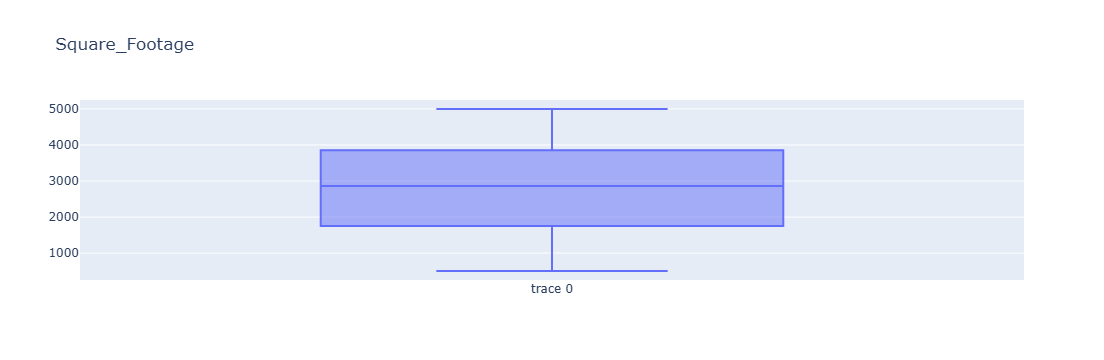

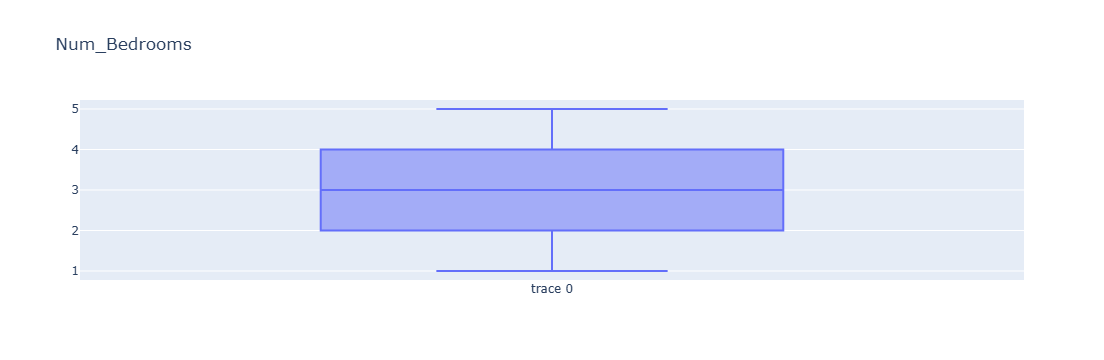

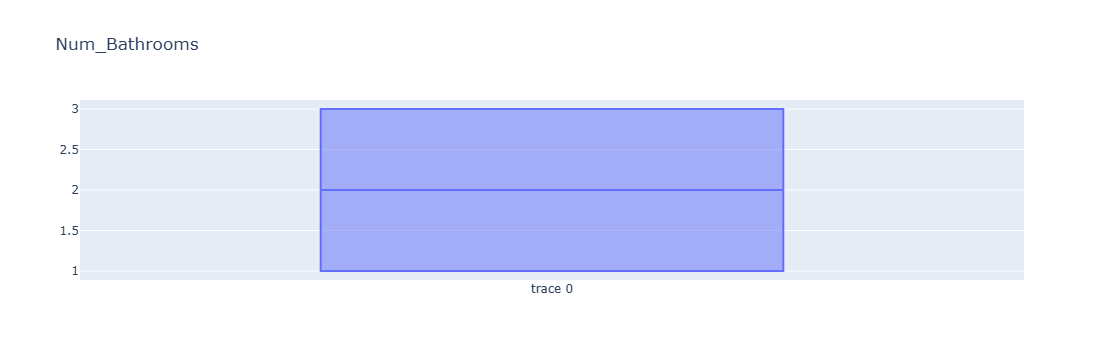

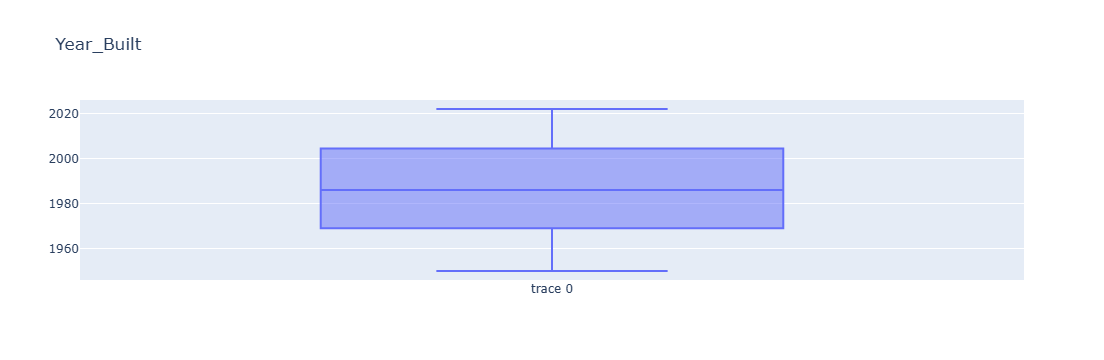

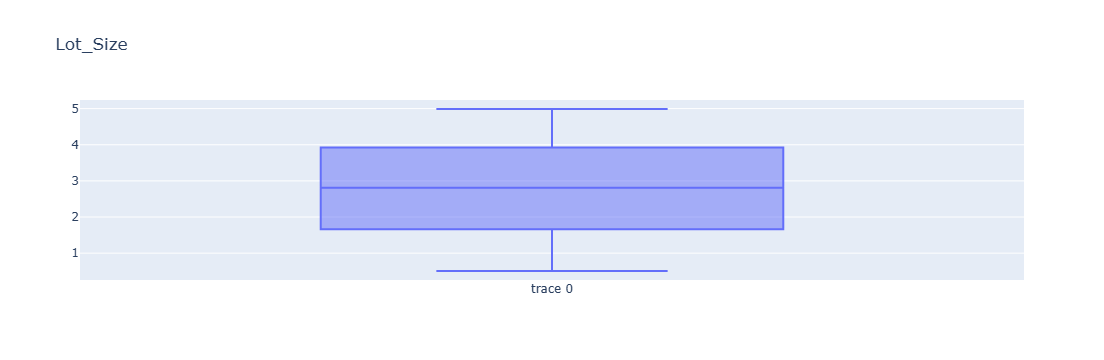

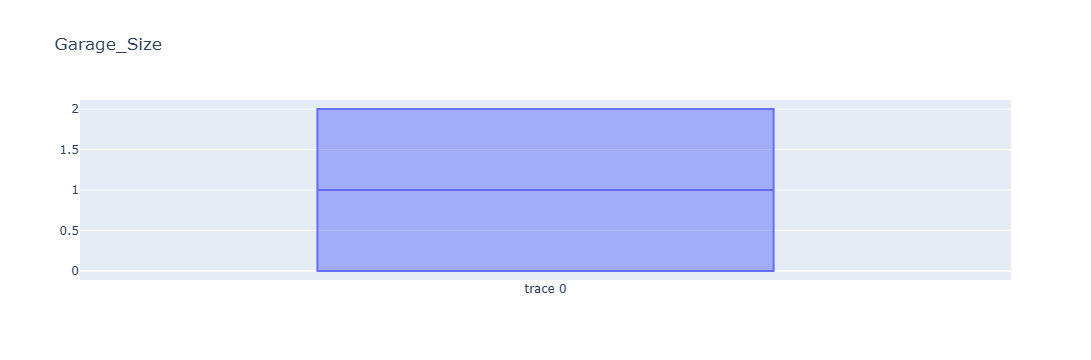

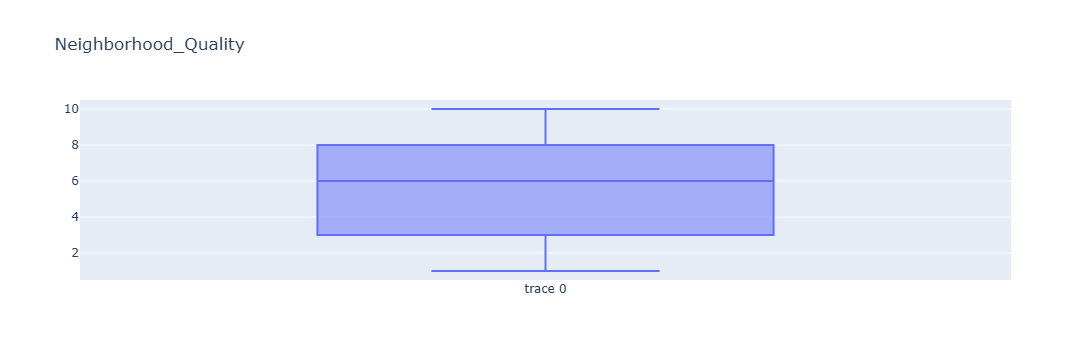

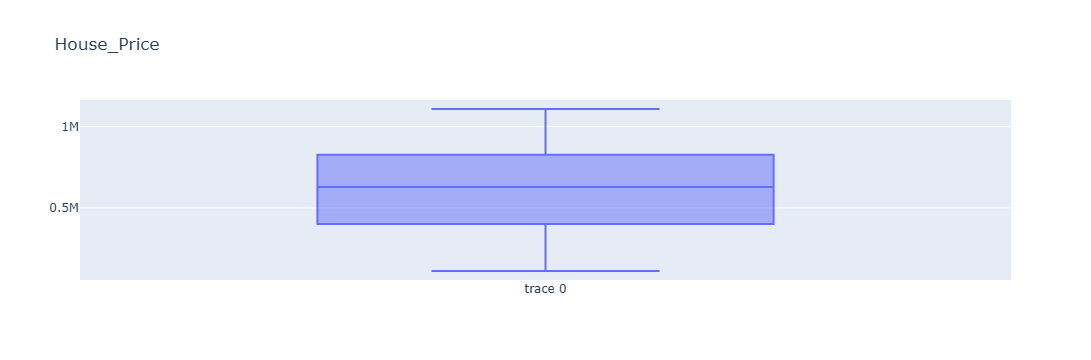

In [55]:
for i in data2.columns:
  data3 = go.Box(y = data2[i])
  layout = go.Layout(title = i)
  fig = go.Figure(data = data3, layout = layout)
  fig.show()

Se busca la correlacion de los datos apra seleccionar las variables

<Figure size 200x200 with 0 Axes>

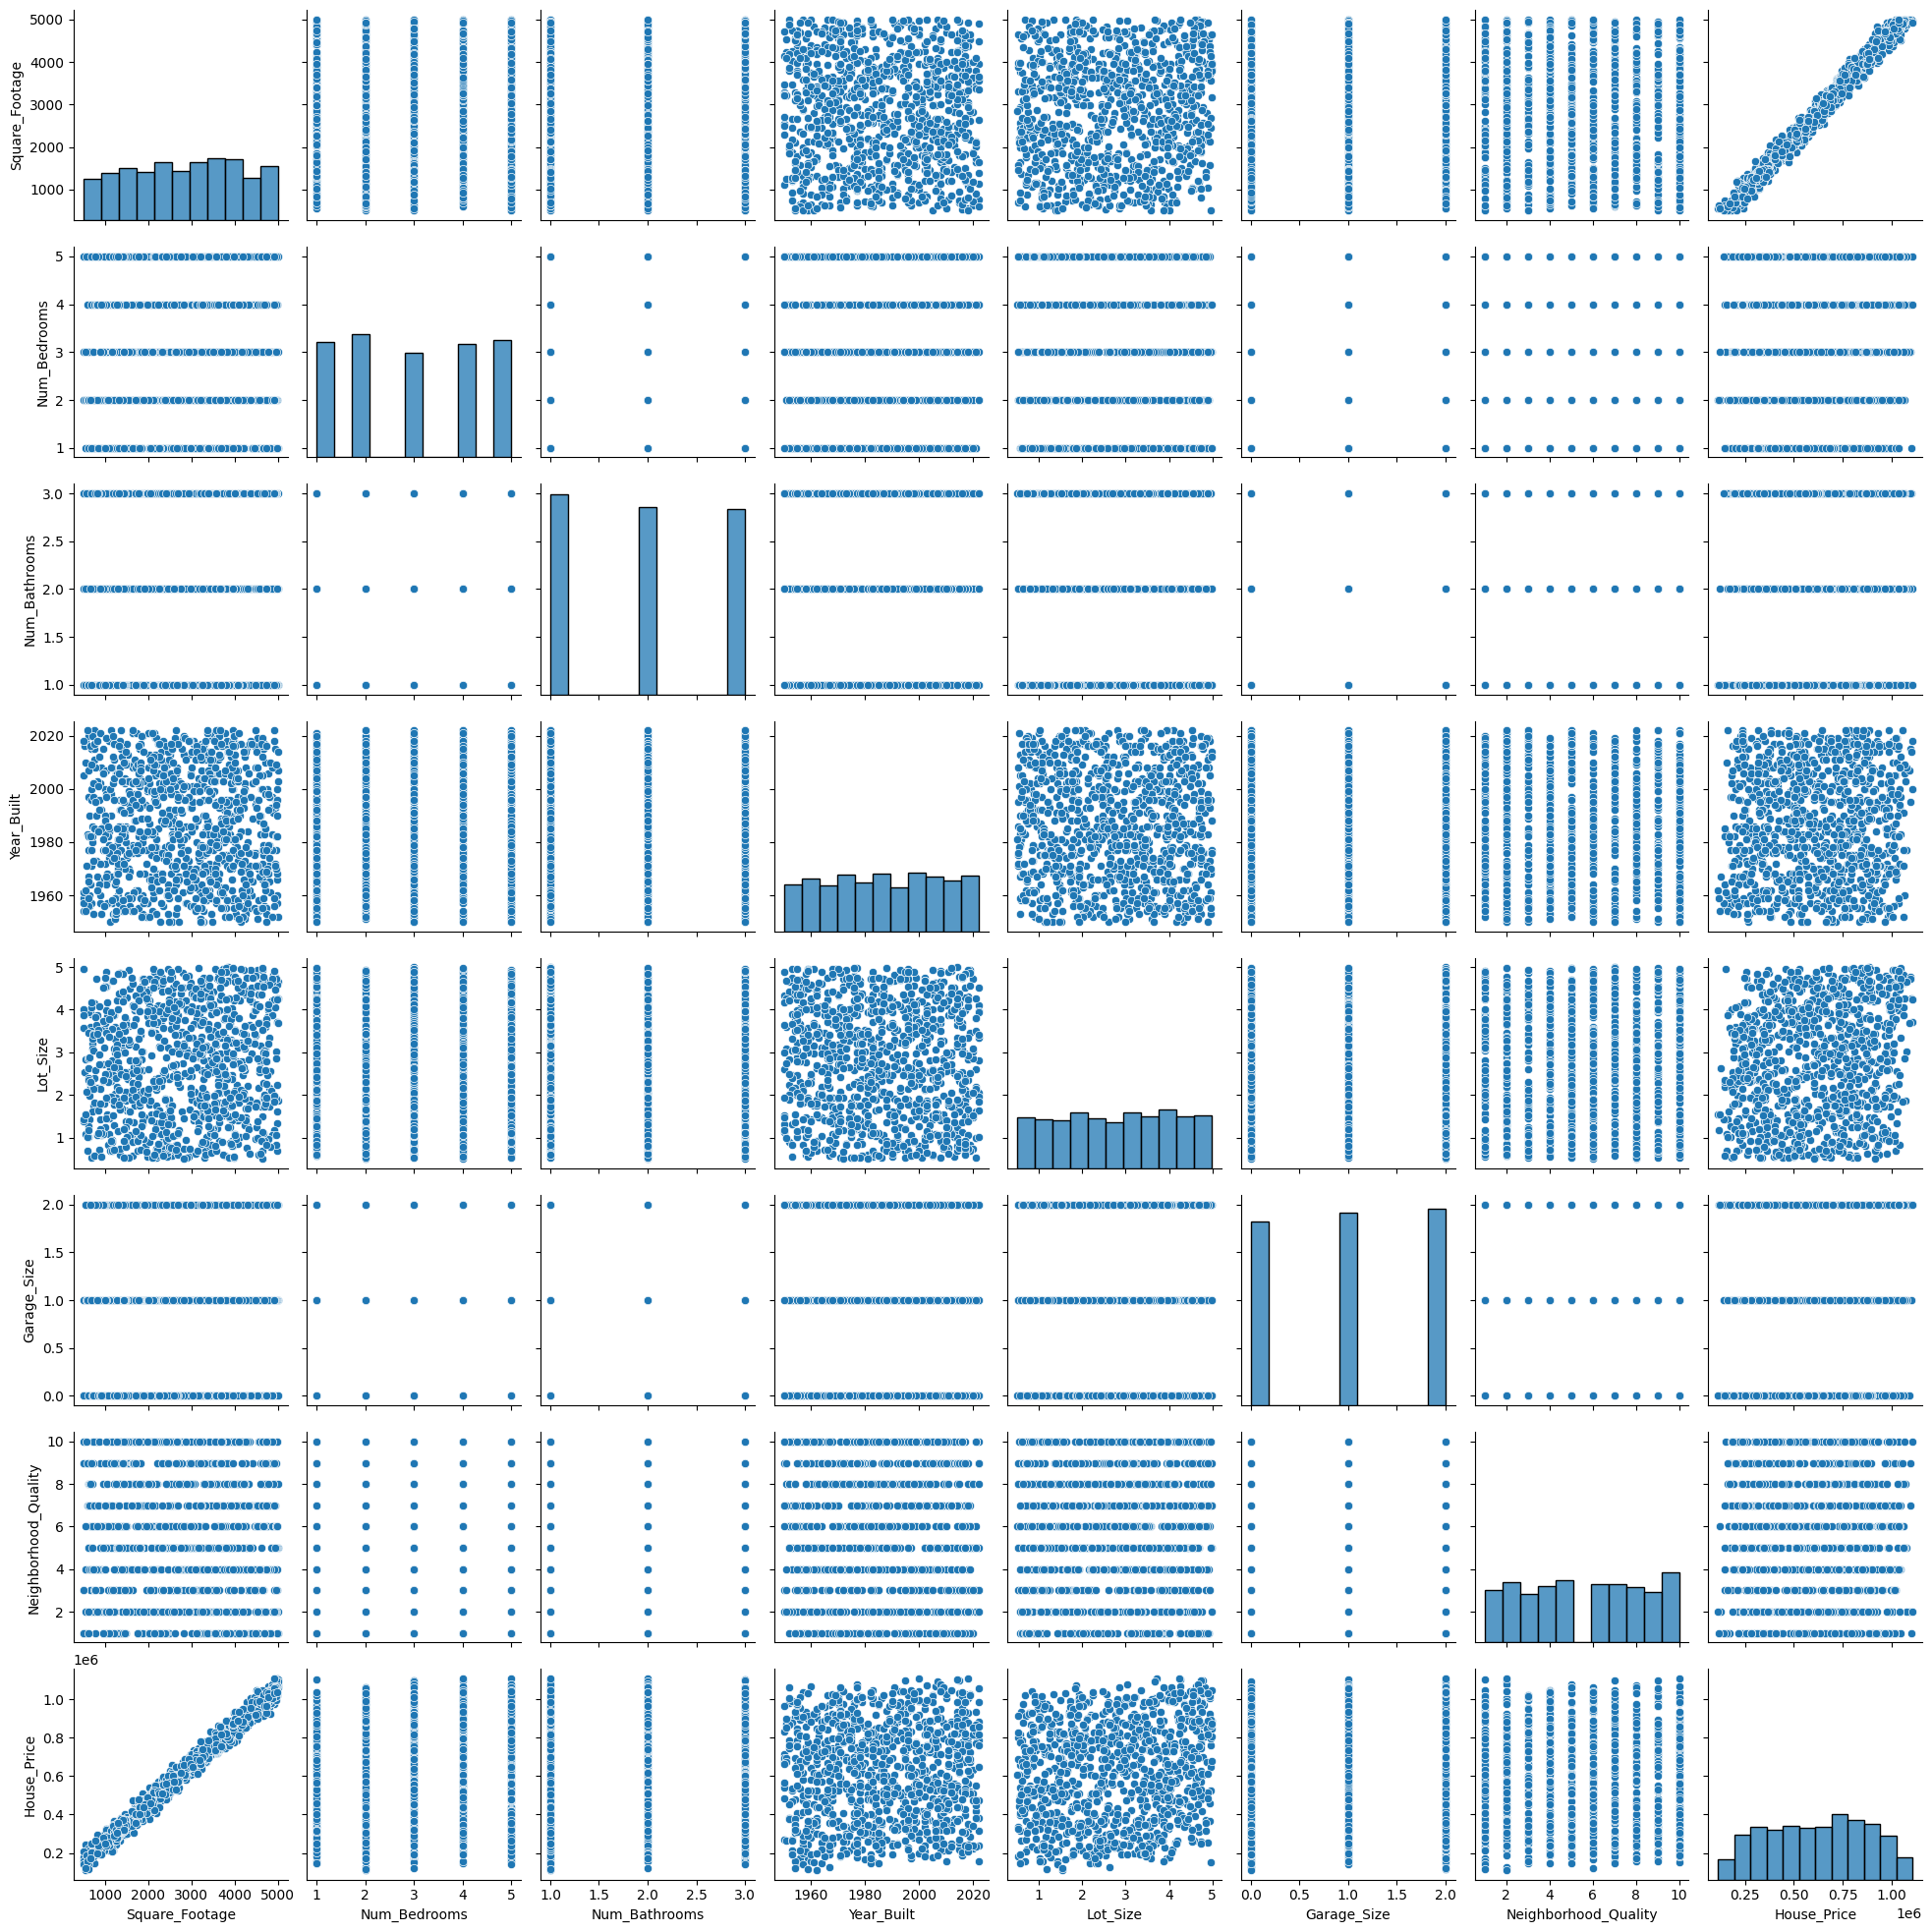

In [57]:
plt.figure(figsize=(2,2))
sns.pairplot(data2)

<Axes: >

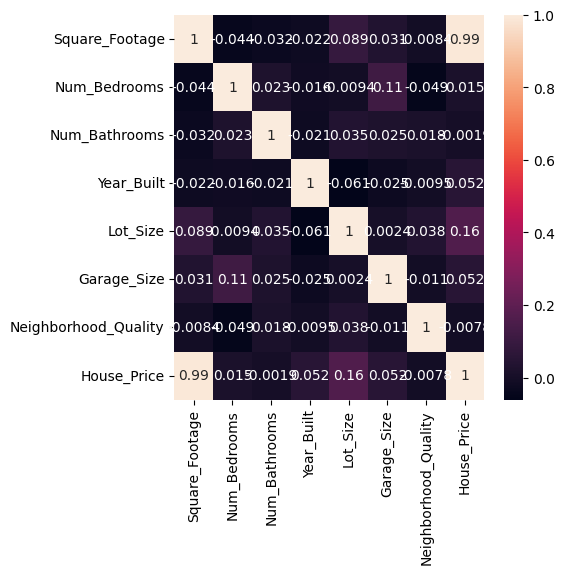

In [58]:
correlacion = data2.select_dtypes(include=['number']).corr()
plt.figure(figsize=(5,5))
sns.heatmap(correlacion, annot=True)

In [59]:
# Se ordenan las variables de acuerdo a su correlacion con price
precio = correlacion.corr()
precio = precio.loc[:,["House_Price"]]
precio.sort_values(ascending=False, by= "House_Price")

House_Price
House_Price              1.000000
Square_Footage           0.998288
Lot_Size                 0.047790
Year_Built              -0.163675
Garage_Size             -0.185952
Neighborhood_Quality    -0.265763
Num_Bedrooms            -0.273810
Num_Bathrooms           -0.297152

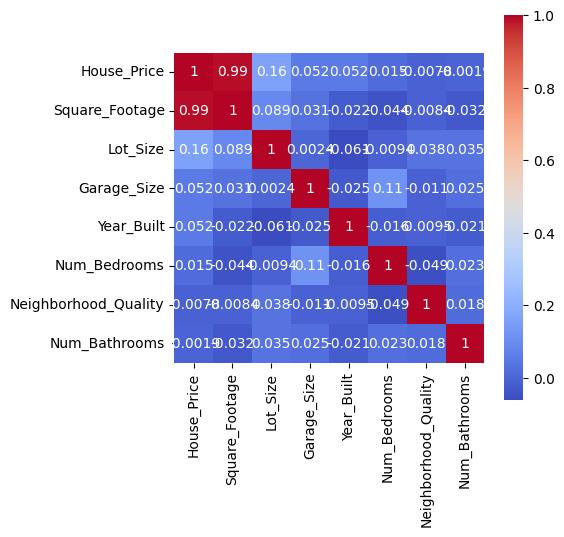

In [65]:
correlaciones = correlacion['House_Price'].abs().sort_values(ascending=False)

# Reordenar el DataFrame de correlación en base a los valores de 'House_Price'
correlacion_ordenada = correlacion.loc[correlaciones.index, correlaciones.index]

# Crear el heatmap con las correlaciones ordenadas
plt.figure(figsize=(5, 5))
sns.heatmap(correlacion_ordenada, annot=True, cmap="coolwarm", square=True)

plt.show()

In [66]:
data2.columns

Index(['Square_Footage', 'Num_Bedrooms', 'Num_Bathrooms', 'Year_Built',
       'Lot_Size', 'Garage_Size', 'Neighborhood_Quality', 'House_Price'],
      dtype='object')

## modelo 1

In [91]:
#Preparacion de datos
x_hipot1 = data2.loc[:,["Square_Footage","Garage_Size","Num_Bedrooms","Num_Bathrooms"]]
y_hipot1 = data2.loc[:,["House_Price"]]

In [92]:
# Preparamos tarin data y test data
x_hipot1_train, x_hipot1_test, y_hipot1_train, y_hipot1_test = train_test_split(x_hipot1, y_hipot1, test_size = 0.20, random_state = 43)

In [93]:
# Regresion lineal
regresion_lineal.fit(x_hipot1_train,y_hipot1_train)

LinearRegression()

## Fase de validacion

In [94]:
# predecimos lso valores y para los datos usados en el entrenamiento
prediccion_entrenamiento = regresion_lineal.predict(x_hipot1_train)

# Calculamos el error cuadratico medio (MSE)
mse_hipot1_train =  mean_squared_error(y_true = y_hipot1_train, y_pred = prediccion_entrenamiento)
print("Error cuadratico medio (MSE) Train: "+ str(mse_hipot1_train))

# Predecimos los valores y para los datos usados en el entrenamiento
prediccion_entrenamiento = regresion_lineal.predict(x_hipot1_test)

# Calculamos el Error Cuadratico Medio (MSE)
mse_hipot1_test = mean_squared_error(y_true = y_hipot1_test, y_pred = prediccion_entrenamiento)
print("Error cuadratico medio (MSE) test: "+ str(mse_hipot1_test))

Error cuadratico medio (MSE) Train: 839858275.1339307
Error cuadratico medio (MSE) test: 833532326.9238793


In [95]:
# se escala la variable charges para hacerla mas estandar
scaler = StandardScaler()

"""Los algortimos de preprocessing de skelearn estan preparados para convertir matrices pro lo que tenemos que hacer una transformacion de nuestra variable y ya que es una variable de tipo Series,
para ello hacemos un .to_numpy que nos convierte la serie en un array y luego hacemos un reshape (-1,1) para transformar un array de 1xn en una matriz de nx1"""
y_hipot1 = scaler.fit_transform(y_hipot1.to_numpy().reshape(-1,1))
# Se vueolve a transformar nuestra variable en un array de 1xn
y_hipot1 = y_hipot1.reshape(1,-1)[0]

In [96]:
x_hipot1_train, x_hipot1_test, y_hipot1_train, y_hipot1_test = train_test_split(x_hipot1, y_hipot1, test_size = 0.20, random_state = 43)

In [97]:
# Regresion lineal
regresion_lineal.fit(x_hipot1_train,y_hipot1_train)

LinearRegression()

In [98]:
# predecimos lso valores y para los datos usados en el entrenamiento
prediccion_entrenamiento = regresion_lineal.predict(x_hipot1_train)

# Calculamos el error cuadratico medio (MSE)
mse_hipot1_train =  mean_squared_error(y_true = y_hipot1_train, y_pred = prediccion_entrenamiento)
print("Error cuadratico medio (MSE) Train: "+ str(mse_hipot1_train))

# Predecimos los valores y para los datos usados en el entrenamiento
prediccion_entrenamiento = regresion_lineal.predict(x_hipot1_test)

# Calculamos el Error Cuadratico Medio (MSE)
mse_hipot1_test = mean_squared_error(y_true = y_hipot1_test, y_pred = prediccion_entrenamiento)
print("Error cuadratico medio (MSE) test: "+ str(mse_hipot1_test))

Error cuadratico medio (MSE) Train: 0.013075292926239622
Error cuadratico medio (MSE) test: 0.012976807707564536


In [99]:
prediccion_hipot1 = regresion_lineal.predict(x_hipot1_test)
prediccion_hipot1 = pd.DataFrame(prediccion_hipot1)

In [100]:
prediccion_hipot1 = regresion_lineal.predict(x_hipot1_test)
prediccion_hipot1 = pd.DataFrame(prediccion_hipot1)
prediccion_hipot1.reset_index(drop = True, inplace = True)
y_hipot1_test=y_hipot1_test.tolist()
df = pd.DataFrame(y_hipot1_test, columns = ['y_hipot1_test'])
df1 = df.join(prediccion_hipot1)
df1

y_hipot1_test         0
0         0.530005  0.497036
1        -0.652151 -0.698254
2        -0.439179 -0.421896
3         0.401878  0.561137
4        -0.367344 -0.412226
..             ...       ...
195      -0.417056 -0.320852
196      -0.978012 -1.142460
197       0.418058  0.405658
198       0.274839  0.451117
199      -1.157984 -0.945610

[200 rows x 2 columns]

## Modelo2

In [110]:
#Preparacion de datos
x_hipot12 = data2.loc[:,["Square_Footage","Garage_Size","Lot_Size"]]
y_hipot12 = data2.loc[:,["House_Price"]]

In [111]:
# Preparamos tarin data y test data
x_hipot12_train, x_hipot12_test, y_hipot12_train, y_hipot12_test = train_test_split(x_hipot12, y_hipot12, test_size = 0.20, random_state = 43)

In [112]:
# Regresion lineal
regresion_lineal.fit(x_hipot12_train,y_hipot12_train)

LinearRegression()

In [113]:
# predecimos lso valores y para los datos usados en el entrenamiento
prediccion_entrenamiento = regresion_lineal.predict(x_hipot12_train)

# Calculamos el error cuadratico medio (MSE)
mse_hipot12_train =  mean_squared_error(y_true = y_hipot12_train, y_pred = prediccion_entrenamiento)
print("Error cuadratico medio (MSE) Train 1: "+ str(mse_hipot1_train))
print("Error cuadratico medio (MSE) Train 1.2: "+ str(mse_hipot12_train))

# Predecimos los valores y para los datos usados en el entrenamiento
prediccion_entrenamiento = regresion_lineal.predict(x_hipot12_test)

# Calculamos el Error Cuadratico Medio (MSE)
mse_hipot12_test = mean_squared_error(y_true = y_hipot12_test, y_pred = prediccion_entrenamiento)
print("Error cuadratico medio (MSE) test 1: "+ str(mse_hipot1_test))
print("Error cuadratico medio (MSE) test 1.2: "+ str(mse_hipot12_test))

Error cuadratico medio (MSE) Train 1: 0.013075292926239622
Error cuadratico medio (MSE) Train 1.2: 752168350.5381035
Error cuadratico medio (MSE) test 1: 0.012976807707564536
Error cuadratico medio (MSE) test 1.2: 762370553.5536381


In [114]:
# se escala la variable charges para hacerla mas estandar
scaler = StandardScaler()

"""Los algortimos de preprocessing de skelearn estan preparados para convertir matrices pro lo que tenemos que hacer una transformacion de nuestra variable y ya que es una variable de tipo Series,
para ello hacemos un .to_numpy que nos convierte la serie en un array y luego hacemos un reshape (-1,1) para transformar un array de 1xn en una matriz de nx1"""
y_hipot12 = scaler.fit_transform(y_hipot12.to_numpy().reshape(-1,1))
# Se vueolve a transformar nuestra variable en un array de 1xn
y_hipot12 = y_hipot12.reshape(1,-1)[0]

In [115]:
x_hipot12_train, x_hipot12_test, y_hipot12_train, y_hipot12_test = train_test_split(x_hipot12, y_hipot12, test_size = 0.20, random_state = 43)

In [116]:
regresion_lineal.fit(x_hipot12_train,y_hipot12_train)

LinearRegression()

## Fase de validacion

In [117]:
# predecimos lso valores y para los datos usados en el entrenamiento
prediccion_entrenamiento = regresion_lineal.predict(x_hipot12_train)

# Calculamos el error cuadratico medio (MSE)
mse_hipot12_train =  mean_squared_error(y_true = y_hipot12_train, y_pred = prediccion_entrenamiento)
print("Error cuadratico medio (MSE) Train 1: "+ str(mse_hipot1_train))
print("Error cuadratico medio (MSE) Train 1.2: "+ str(mse_hipot12_train))

# Predecimos los valores y para los datos usados en el entrenamiento
prediccion_entrenamiento = regresion_lineal.predict(x_hipot12_test)

# Calculamos el Error Cuadratico Medio (MSE)
mse_hipot12_test = mean_squared_error(y_true = y_hipot12_test, y_pred = prediccion_entrenamiento)
print("Error cuadratico medio (MSE) test 1: "+ str(mse_hipot1_test))
print("Error cuadratico medio (MSE) test 1.2: "+ str(mse_hipot12_test))

Error cuadratico medio (MSE) Train 1: 0.013075292926239622
Error cuadratico medio (MSE) Train 1.2: 0.011710096577382471
Error cuadratico medio (MSE) test 1: 0.012976807707564536
Error cuadratico medio (MSE) test 1.2: 0.011868929081473488


In [118]:
prediccion_hipot12 = regresion_lineal.predict(x_hipot12_test)
prediccion_hipot12 = pd.DataFrame(prediccion_hipot12)
prediccion_hipot12.reset_index(drop = True, inplace = True)
y_hipot12_test=y_hipot12_test.tolist()
df12 = pd.DataFrame(y_hipot12_test, columns = ['y_hipot12_test'])
df12 = df12.join(prediccion_hipot1)
df12

y_hipot12_test         0
0          0.530005  0.497036
1         -0.652151 -0.698254
2         -0.439179 -0.421896
3          0.401878  0.561137
4         -0.367344 -0.412226
..              ...       ...
195       -0.417056 -0.320852
196       -0.978012 -1.142460
197        0.418058  0.405658
198        0.274839  0.451117
199       -1.157984 -0.945610

[200 rows x 2 columns]

Al comparar ambos mododelos, vemos que el primero tuvo un mejor acercamineto, sin embargo, al tener datos poco relacionados en este caso con la data y el precio, la exactitud deja mucho que esperar 